In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [2]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [3]:
GT = pd.read_csv('./groundtruth.csv',header=None)
GT = GT[0].str.split('\t', expand = True)
GT[0] = GT[0].astype(int)
GT[1] = GT[1].astype(int)
GT[2] = GT[2].astype(int)
GT[3] = GT[3].astype(int)
GT.head()

,0,1,2,3
0,213,121,21,95
1,213,119,21,95
2,211,119,21,95
3,210,116,21,95
4,209,115,21,95


In [4]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,213,121,234,216
1,213,119,234,214
2,211,119,232,214
3,210,116,231,211
4,209,115,230,210


In [5]:
csrt = pd.read_csv('./results/csrt.csv')
kcf = pd.read_csv('./results/kcf.csv')
boosting = pd.read_csv('./results/boosting.csv')
mil = pd.read_csv('./results/MIL.csv')
tld = pd.read_csv('./results/TLD.csv')
mf = pd.read_csv('./results/medianflow.csv')

In [6]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(597):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [8]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [9]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(597)]

In [11]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)

Robustness： 0.0
mIoU: 0.7293794658315841


In [34]:
precision = []

In [35]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(597):
        if IoU_csrt[i] > j:
            TP.append(IoU_csrt[i])
        elif IoU_csrt[i] < j:
            FP.append(IoU_csrt[i])     
    Recall = len(TP) / (597)
    print('Recall：',Recall)
    Precision = (len(TP) / (597-count_csrt))*100
    print('Precision：', Precision)
    precision.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9966499162479062
Precision： 99.66499162479062
Recall： 0.9363484087102177
Precision： 93.63484087102178
Recall： 0.932998324958124
Precision： 93.2998324958124
Recall： 0.931323283082077
Precision： 93.1323283082077
Recall： 0.9078726968174204
Precision： 90.78726968174205
Recall： 0.7068676716917923
Precision： 70.68676716917923
Recall： 0.3165829145728643
Precision： 31.65829145728643
Recall： 0.051926298157453935
Precision： 5.192629815745393
Recall： 0.0
Precision： 0.0


In [36]:
precision

[100.0,
 100.0,
 99.66499162479062,
 93.63484087102178,
 93.2998324958124,
 93.1323283082077,
 90.78726968174205,
 70.68676716917923,
 31.65829145728643,
 5.192629815745393,
 0.0]

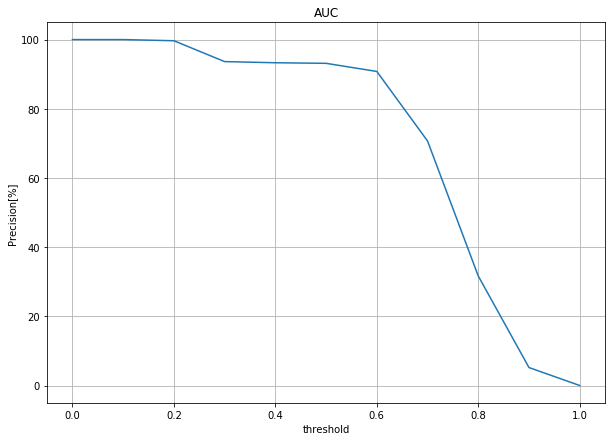

In [47]:
plt.figure(figsize=(10,7))
plt.plot(th, precision, antialiased=True)
plt.grid()
plt.title('AUC')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()